<a href="https://colab.research.google.com/github/Abhimokashe/Lasso-and-ridge-on-boston_dataset/blob/main/Lasso_And_Ridge_Klib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
#Importing independances to import the boston housing dataset.
import pandas as pd
#import boston data from sklearn
from sklearn.datasets import load_boston

#pandas daraframe
boston_dataset = load_boston()
type(boston_dataset)
boston_df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [ ]:
df = boston_df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
#X = boston_pd.iloc[:, :-1]

#output
#Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [ ]:
df1 = boston_pd.copy()

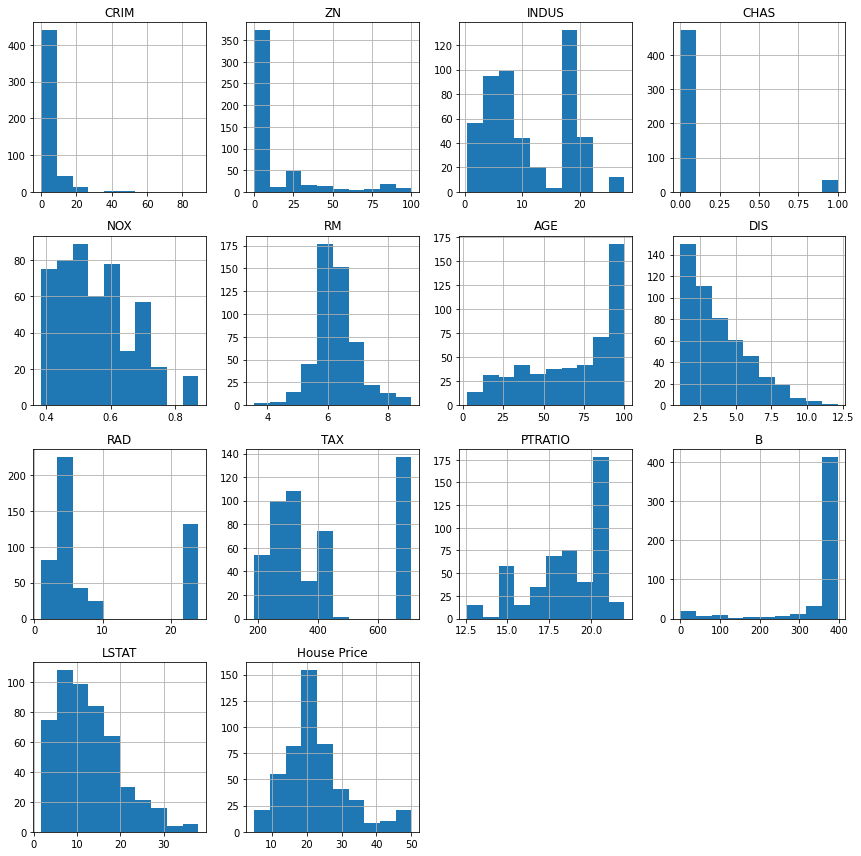

In [ ]:
df1.hist(figsize=(12,12))
plt.tight_layout()
plt.show()

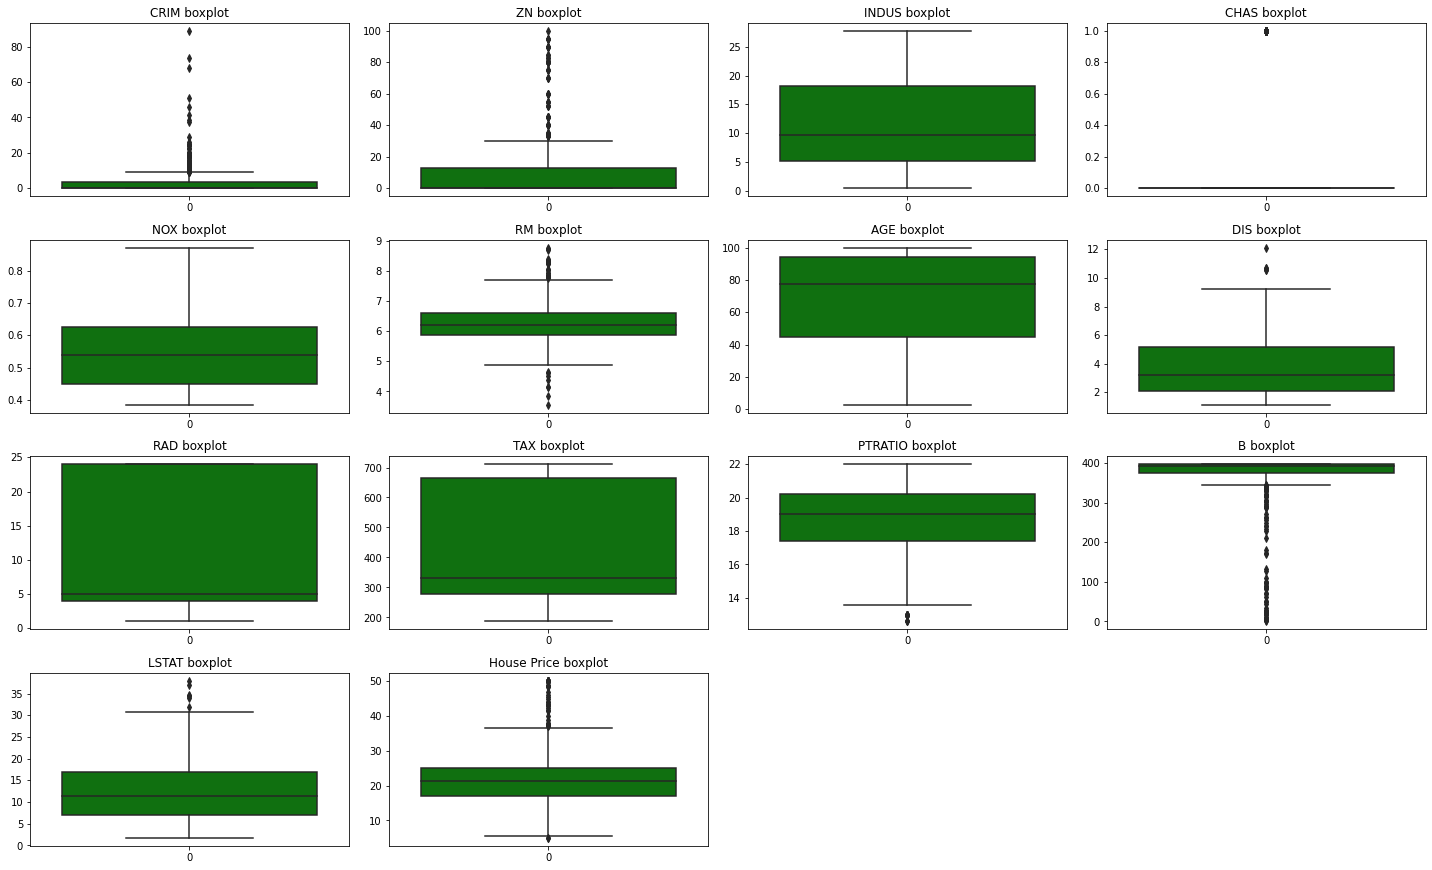

In [ ]:
cont_vars = list(df1.columns)
def outliers_visual(data):
    plt.figure(figsize=(20, 30))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(10, 4, i)
        sns.boxplot(data[col],color='green')
        plt.title('{} boxplot'.format(col))
      
    plt.tight_layout()
    plt.show()
outliers_visual(df1)

In [ ]:
corr_p = df1.corr()

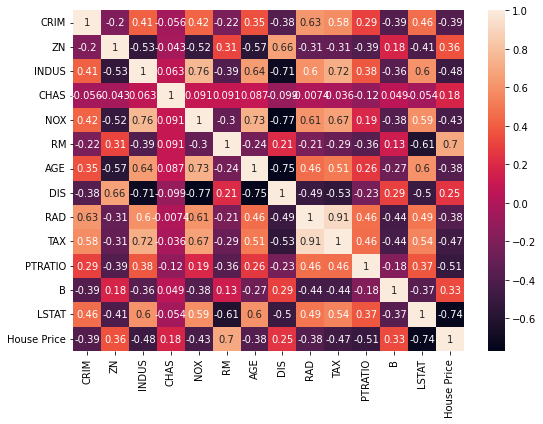

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_p,annot=True)
plt.tight_layout()
plt.show()

In [ ]:
# Multicollinearity between independent variable

m = df1.drop('House Price',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = m.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(m.values, i)
                          for i in range(len(m.columns))]
  
print(vif_data)

    feature        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


In [ ]:
df1.drop('PTRATIO',axis=1,inplace=True)

In [ ]:
# Multicollinearity between independent variable

m = df1.drop('House Price',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = m.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(m.values, i)
                          for i in range(len(m.columns))]
  
print(vif_data)

   feature        VIF
0     CRIM   2.099345
1       ZN   2.451624
2    INDUS  14.275283
3     CHAS   1.142167
4      NOX  73.894171
5       RM  60.598846
6      AGE  21.361234
7      DIS  12.221605
8      RAD  15.159162
9      TAX  59.301541
10       B  18.614751
11   LSTAT  10.138324


In [ ]:
df1.drop('NOX',axis=1,inplace=True)

In [ ]:
# Multicollinearity between independent variable

m = df1.drop('House Price',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = m.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(m.values, i)
                          for i in range(len(m.columns))]
  
print(vif_data)

   feature        VIF
0     CRIM   2.097537
1       ZN   2.449661
2    INDUS  13.150904
3     CHAS   1.138277
4       RM  41.406746
5      AGE  19.889623
6      DIS  12.032952
7      RAD  15.155012
8      TAX  57.720347
9        B  18.396072
10   LSTAT   9.207840


In [ ]:
df1.drop('TAX',axis=1,inplace=True)

In [ ]:
# Multicollinearity between independent variable

m = df1.drop('House Price',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = m.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(m.values, i)
                          for i in range(len(m.columns))]
  
print(vif_data)

  feature        VIF
0    CRIM   2.097466
1      ZN   2.375219
2   INDUS   9.290080
3    CHAS   1.118613
4      RM  39.069063
5     AGE  19.780944
6     DIS  11.817803
7     RAD   4.965633
8       B  18.289917
9   LSTAT   9.046248


In [ ]:
df1.drop('RM',axis=1,inplace=True)

In [ ]:
# Multicollinearity between independent variable

m = df1.drop('House Price',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = m.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(m.values, i)
                          for i in range(len(m.columns))]
  
print(vif_data)

  feature        VIF
0    CRIM   2.095367
1      ZN   2.334763
2   INDUS   9.016142
3    CHAS   1.116229
4     AGE  14.000758
5     DIS   8.447694
6     RAD   4.771767
7       B  13.537020
8   LSTAT   8.358925


In [ ]:
df1.drop('AGE',axis=1,inplace=True)

In [ ]:
# Multicollinearity between independent variable

m = df1.drop('House Price',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = m.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(m.values, i)
                          for i in range(len(m.columns))]
  
print(vif_data)

  feature        VIF
0    CRIM   2.095211
1      ZN   2.313889
2   INDUS   8.205465
3    CHAS   1.106350
4     DIS   8.209371
5     RAD   4.689836
6       B  10.074224
7   LSTAT   6.856889


In [ ]:
df1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'B', 'LSTAT',
       'House Price'],
      dtype='object')

In [ ]:
# Here applying min max scaling on dataframe for.
# Applying min max scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'B', 'LSTAT']] = scaler.fit_transform(df1[['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'B', 'LSTAT']])
df1.head()

,CRIM,ZN,INDUS,CHAS,DIS,RAD,B,LSTAT,House Price
0,0.000000,0.18,0.067815,0.0,0.269203,0.000000,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.348962,0.043478,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.348962,0.043478,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.448545,0.086957,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.448545,0.086957,1.000000,0.099338,36.2


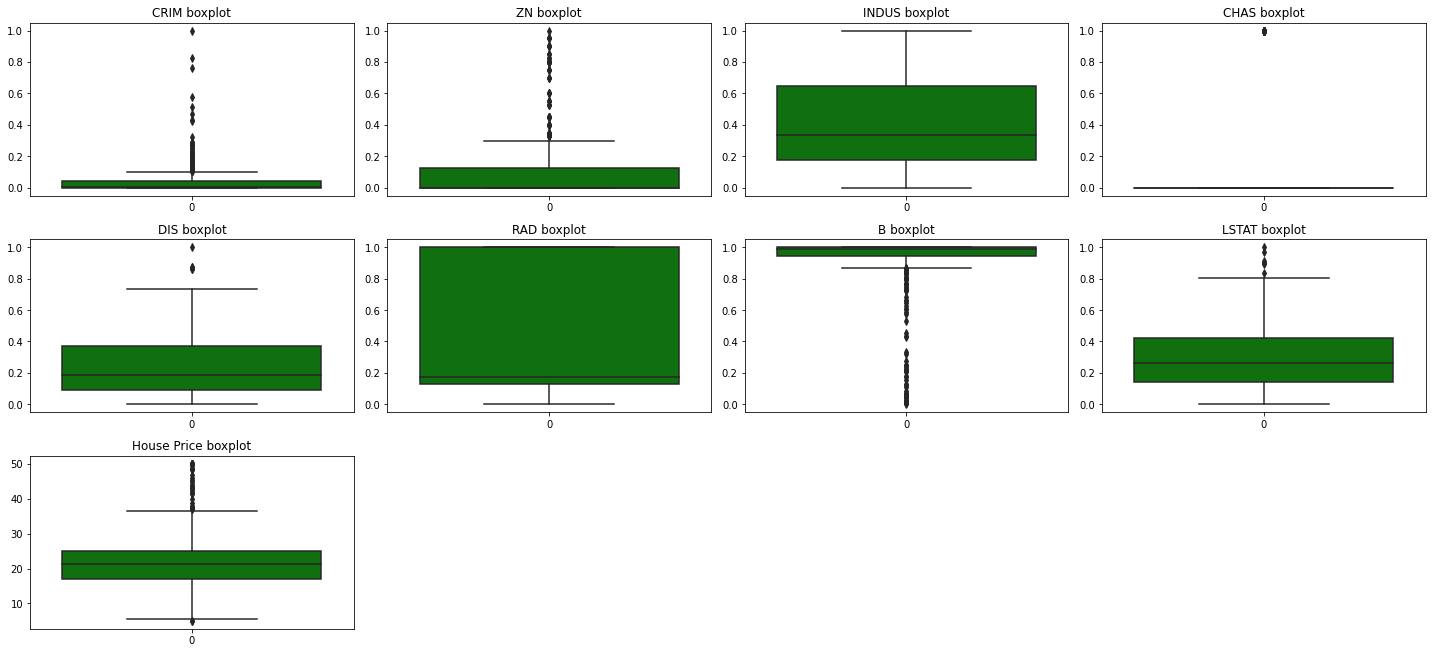

In [ ]:
cont_vars = list(df1.columns)
def outliers_visual(data):
    plt.figure(figsize=(20, 30))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(10, 4, i)
        sns.boxplot(data[col],color='green')
        plt.title('{} boxplot'.format(col))
      
    plt.tight_layout()
    plt.show()
outliers_visual(df1)

In [ ]:
# Data splitting (without treating outliers)
X = df1.drop('House Price',axis=1)
y = df1['House Price']
print(X.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

# Fitting linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_train = regr.predict(X_train)
y_pred_train

(506, 8)
(506,)


array([31.27268136, 21.27586578, 22.88855683, 20.89407672,  8.05113558,
       21.01185108, 27.41331825, 26.65050368, 29.09186627, 11.16514124,
       14.72546055, 22.13068118,  5.71221489, 23.48419645,  2.75357928,
       22.4488501 , 11.05424996, 41.80262077, 30.03239242, 12.76151133,
       15.95529955, 24.5495731 , 25.63391855, 16.78333401, 34.05989616,
       12.98051843, 22.8991461 , 34.75681279, 18.32792213,  9.51566775,
       15.97465959, 19.83278744, 12.03597931, 31.0154879 , 24.76662226,
       16.09304704, 22.86563797,  6.15027158, 12.18356231, 24.05496319,
       32.46693894, 25.90599442, 25.15137046, 19.1839873 , 33.7237077 ,
       26.24952592, 13.38348723,  7.02889822, 29.61134208, 26.33990343,
        5.21369802, 28.88301982, 18.1683506 , 30.07968216, 16.34459087,
       17.3645802 , 19.18671693, 15.76044651,  8.32528539, 23.29307492,
       29.95731736, 29.26874839, 20.11642338, 19.7530312 , 25.16338665,
       27.62623076, 24.73735356, 18.40180895, 32.54691826, 10.53

In [ ]:
# Calculating MSE,RMSE,R2 Score values for train (without treating outliers)

MSE_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, y_pred_train)
print(f'R2_Score= {R2_Score_train}')

# Putting together the coefficient and their corresponding variable names
regr_coefficient = pd.DataFrame()
regr_coefficient["Columns"] = X_train.columns
regr_coefficient['Coefficient Estimate'] = pd.Series(regr.coef_)
print(regr_coefficient)

MSE= 27.70698888309347
RMSE= 5.263742858754925
R2_Score= 0.6745856440103755
  Columns  Coefficient Estimate
0    CRIM             -8.851526
1      ZN             10.079076
2   INDUS             -8.293871
3    CHAS              4.022602
4     DIS            -20.634747
5     RAD             -0.878253
6       B              1.511707
7   LSTAT            -29.316502


In [ ]:
# Fitting the linear regression model (without treating outliers)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr1 = linear_model.LinearRegression()
regr1.fit(X_train,y_train)
y_pred_test = regr1.predict(X_test)
y_pred_test

array([25.77102398, 25.36254553, 27.50101644, 14.64564175, 19.19239231,
       24.73275517, 20.60959141, 24.40084328, 24.16616343, 24.9683657 ,
        7.47220442, 13.49187922, 17.09578414,  8.24410607, 35.00685731,
       30.27937361, 20.60850965, 33.22618796, 31.07993008, 26.23303712,
       25.92519217, 21.94685181, 24.49843342, 31.05749459, 22.65833022,
       20.32616832, 21.27513216, 20.02946138, 31.78948561, 20.82000237,
       16.55948457, 18.63389659, 19.46412349, 22.0769828 , 29.00545217,
       24.31955826,  9.17255823, 30.01145558, 16.13995289, 11.67126111,
       21.06145773, 19.46936516, 23.09565474, 16.09717611, 23.32216367,
       23.77791523, 13.64904783, 24.65558305, 10.08058541, 27.07165717,
       23.64456331, 20.02502509, 24.09249927, 23.27609191, 16.89924877,
       18.42637521, 21.83575873, 15.85591917, 18.88095541, 22.0939119 ,
       21.6782112 , 21.70097656, 29.75788597, 31.04837658, 17.76189694,
       33.69549936, 16.83928699, 12.90569555, 15.28463835, 23.13

In [ ]:
# Use MSE to evaluate the above model (without treating outliers)

MSE_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

print("R2_Score: {}".format(r2_score(y_true = y_test,y_pred= y_pred_test)))

MSE= 43.09036392740202
RMSE= 6.564325093061892
R2_Score: 0.47081923190685127


# **Outliers Treatment**

In [ ]:
df2 = df1.copy()

In [ ]:
# Calculate first and third quantile
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df2 = df2[~((df2 < (Q1 - (1.5 * IQR))) |(df2 > (Q3 + (1.5 * IQR)))).any(axis=1)]
df2.shape

CRIM           0.040407
ZN             0.125000
INDUS          0.473240
CHAS           0.000000
DIS            0.280829
RAD            0.869565
B              0.052568
LSTAT          0.276076
House Price    7.975000
dtype: float64


(276, 9)

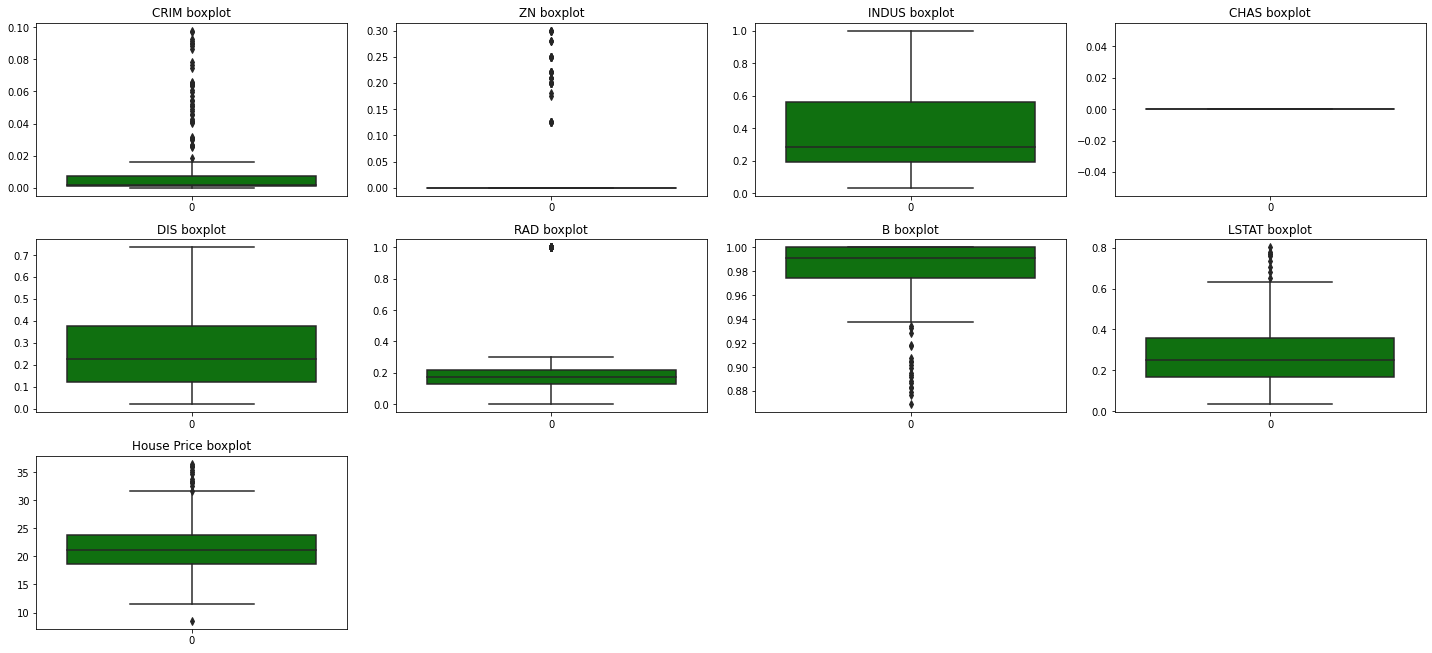

In [ ]:
cont_vars = list(df2.columns)
def outliers_visual(data):
  plt.figure(figsize=(20, 30))
  i = 0
  for col in cont_vars:
      i += 1
      plt.subplot(10, 4, i)
      sns.boxplot(data[col],color='green')
      plt.title('{} boxplot'.format(col))
      
  plt.tight_layout()
  plt.show()
outliers_visual(df2)

In [ ]:
df2.shape

(276, 9)

In [ ]:
# Data splitting
X = df2.drop('House Price',axis=1)
y = df2['House Price']
print(X.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,random_state=0,test_size=0.2)

# Fitting linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train1,y_train1)
y_pred_train1 = regr.predict(X_train1)
y_pred_train1

(276, 8)
(276,)


array([26.91204276, 20.26211822, 21.63066328, 25.70445452, 21.47938009,
       24.48743286, 12.74148816, 25.08127754, 25.90315168, 23.83481321,
       23.18753665, 26.70340884, 22.71266481, 20.53134435, 24.06231351,
       20.11752777, 23.1036851 , 18.62875667, 22.02217468, 23.17916488,
       17.69960937, 26.10928813, 23.16410066, 18.0388312 , 23.12367587,
       19.72429035, 18.11324309, 23.70379293, 23.4950357 , 23.71218968,
       17.43263768, 23.57270521, 21.72908423, 17.18497457, 21.55750289,
       14.57579621, 23.86734735, 10.0044394 , 26.80356193, 26.21851411,
       27.08668382, 25.52025425, 17.81591969, 24.96607096, 20.88317705,
       25.84709299, 23.77460326, 26.7800629 , 22.68226952, 22.20568259,
       21.08646275, 17.69762623, 23.24777713, 22.6411818 , 21.44819221,
       16.42747921, 25.60402422, 22.95937176, 16.24448458, 24.12254127,
       24.1695846 , 26.37777373, 25.89484115, 19.32438579, 24.46214485,
       25.2417862 , 27.62873467, 22.68941445, 22.6523913 , 22.44

In [ ]:
# Calculating MSE,RMSE,R2 Score values for train

MSE_train1 = mean_squared_error(y_train1, y_pred_train1)
print(f'MSE= {MSE_train1}')

RMSE_train1 = np.sqrt(MSE_train1)
print(f'RMSE= {RMSE_train1}')

R2_Score_train1 = r2_score(y_train1, y_pred_train1)
print(f'R2_Score= {R2_Score_train1}')

# Putting together the coefficient and their corresponding variable names
regr_coefficient = pd.DataFrame()
regr_coefficient["Columns"] = X_train1.columns
regr_coefficient['Coefficient Estimate'] = pd.Series(regr.coef_)
print(regr_coefficient)

MSE= 11.751288882693338
RMSE= 3.428015297908301
R2_Score= 0.5139497429742228
  Columns  Coefficient Estimate
0    CRIM         -6.486201e+01
1      ZN          6.320882e+00
2   INDUS         -6.130765e+00
3    CHAS          7.993606e-15
4     DIS         -9.974759e+00
5     RAD          4.433375e+00
6       B         -2.542289e+00
7   LSTAT         -2.077977e+01


In [ ]:
# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr1 = linear_model.LinearRegression()
regr1.fit(X_train1,y_train1)
y_pred_test1 = regr1.predict(X_test1)
y_pred_test1

array([27.57640544, 23.03837561, 20.18141998, 24.77256792, 21.46872667,
       20.36629568, 23.19803852, 18.70309229, 10.09559564, 26.05738085,
       18.28831234, 24.01666433, 21.37593131, 23.89718652, 16.20776312,
       16.60557631, 23.83522534, 23.96895173, 21.81553188, 10.7016014 ,
       21.0993013 , 26.92655282, 22.55144124, 22.60236255, 19.48860834,
       28.2370312 , 21.0897607 , 13.86376674, 16.98493192, 23.2296512 ,
       23.54380457, 17.75736429, 23.26130812, 15.93062109, 15.56904169,
       11.83127579, 10.97700357, 25.066006  , 21.96314074, 17.13292017,
       18.37011664, 24.84364627, 24.17444325, 19.70109416, 21.60429881,
       16.33976388, 21.14703885, 10.83818339, 15.03748512, 17.74447447,
       26.49852161, 22.02984955, 21.43348793, 21.80197047, 21.9646115 ,
       23.34882199])

In [ ]:
# Use MSE to evaluate the above model

MSE_test1 = mean_squared_error(y_test1, y_pred_test1)
print(f'MSE= {MSE_test1}')

RMSE_test1 = np.sqrt(MSE_test1)
print(f'RMSE= {RMSE_test1}')

print("R2_Score: {}".format(r2_score(y_true = y_test1,y_pred= y_pred_test1)))

MSE= 14.210584953403194
RMSE= 3.769692952138568
R2_Score: 0.4315719616349877


<Axes: title={'center': 'Feature-correlation (pearson)'}>

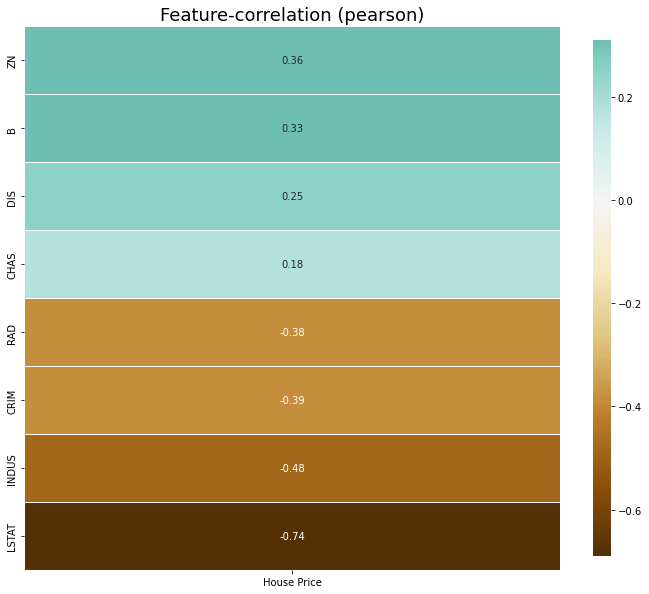

In [ ]:
# Without removing outlier
import klib
klib.describe.corr_plot(df1.drop('House Price',axis=1),target=df1['House Price'])

<Axes: title={'center': 'Feature-correlation (pearson)'}>

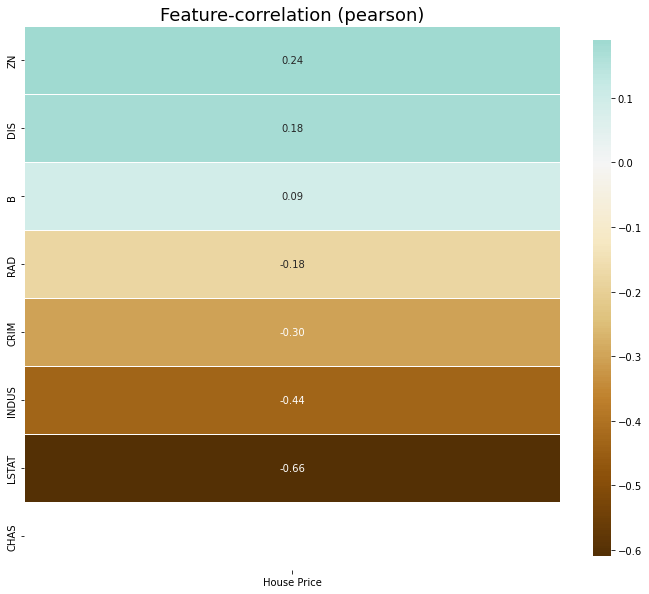

In [ ]:
klib.describe.corr_plot(df2.drop('House Price',axis=1),target=df2['House Price'])

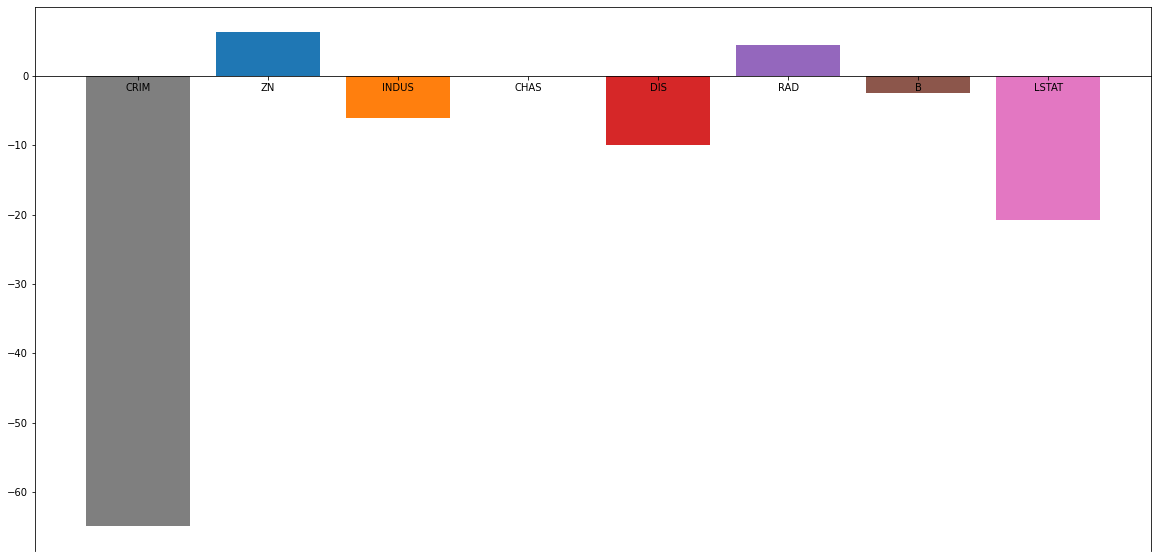

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(regr_coefficient["Columns"],
regr_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

     


# **Ridge Regression: It is used for overfitting. But model is underfitting**

In [ ]:
# # import ridge regression from sklearn library
# from sklearn.linear_model import Ridge

# # Train the model
# ridgeR = Ridge(alpha = 1)
# ridgeR.fit(X_train1, y_train1)
# y_pred = ridgeR.predict(X_test1)

# # calculate mean square error
# mean_squared_error_ridge = np.mean((y_pred - y_test1)**2)
# print(mean_squared_error_ridge)

# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train1.columns
# ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
# print(ridge_coefficient)

13.820972644112143
  Columns  Coefficient Estimate
0    CRIM             -1.320899
1      ZN              3.297071
2   INDUS             -5.950573
3    CHAS              0.000000
4     DIS             -5.376851
5     RAD              0.336155
6       B             -0.048070
7   LSTAT            -16.900786


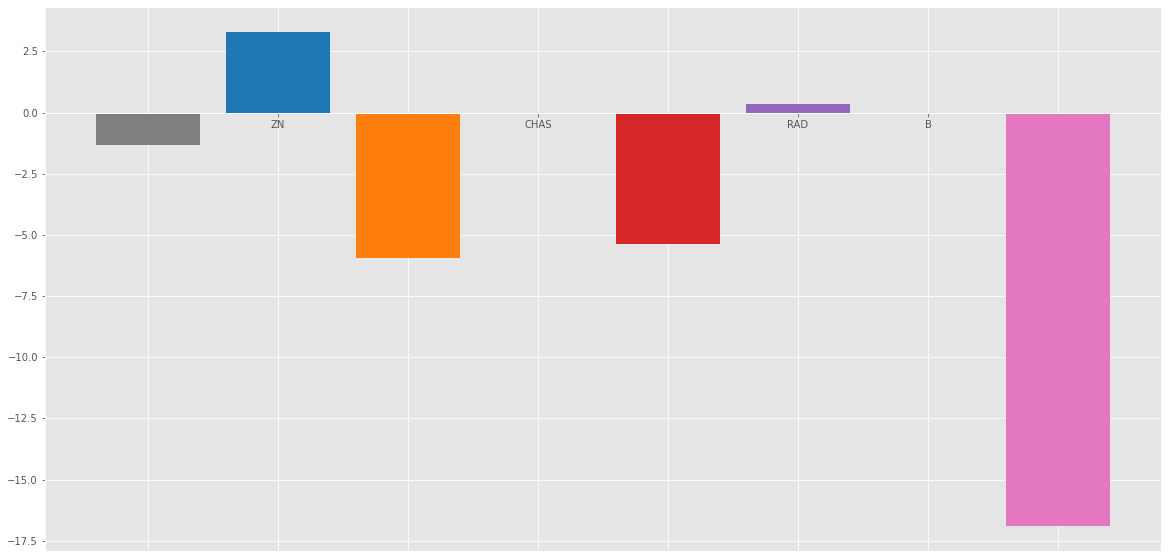

In [ ]:
# # plotting the coefficient score
# fig, ax = plt.subplots(figsize =(20, 10))

# color =['tab:gray', 'tab:blue', 'tab:orange',
# 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
# 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
# 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# ax.bar(ridge_coefficient["Columns"],
# ridge_coefficient['Coefficient Estimate'],
# color = color)

# ax.spines['bottom'].set_position('zero')

# plt.style.use('ggplot')
# plt.show()

In [ ]:
# # Train the model
# ridgeR = Ridge(alpha = 3)
# ridgeR.fit(X_train1, y_train1)
# y_pred = ridgeR.predict(X_test1)

# # calculate mean square error
# mean_squared_error_ridge = np.mean((y_pred - y_test1)**2)
# print(mean_squared_error_ridge)

# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train1.columns
# ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
# print(ridge_coefficient)

14.224501567385724
  Columns  Coefficient Estimate
0    CRIM             -0.563265
1      ZN              1.738645
2   INDUS             -5.300978
3    CHAS              0.000000
4     DIS             -2.624046
5     RAD             -0.112903
6       B              0.099119
7   LSTAT            -11.818601


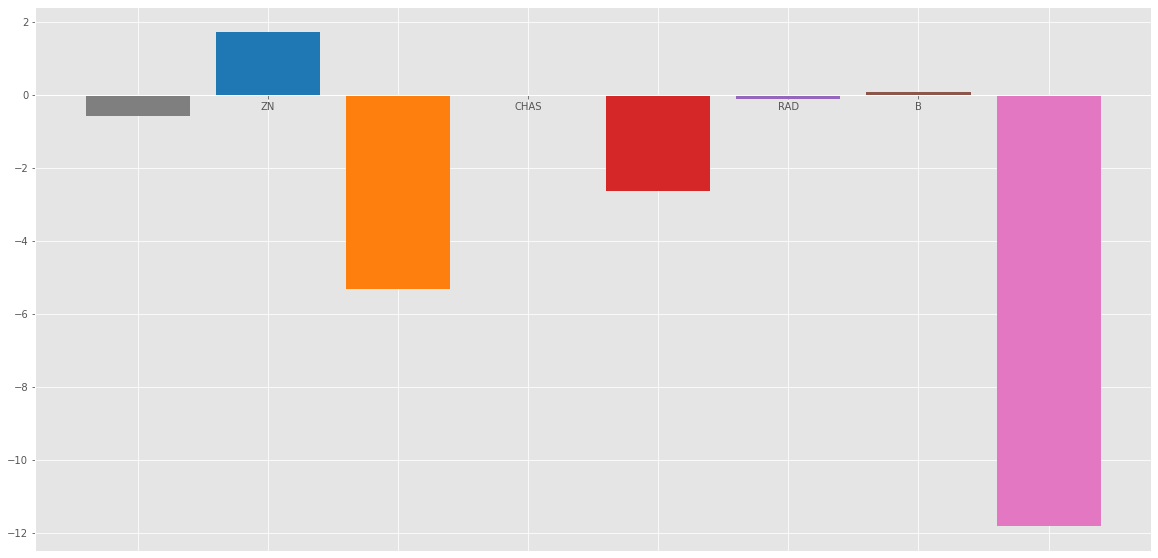

In [ ]:
# # plotting the coefficient score
# fig, ax = plt.subplots(figsize =(20, 10))

# color =['tab:gray', 'tab:blue', 'tab:orange',
# 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
# 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
# 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# ax.bar(ridge_coefficient["Columns"],
# ridge_coefficient['Coefficient Estimate'],
# color = color)

# ax.spines['bottom'].set_position('zero')

# plt.style.use('ggplot')
# plt.show()

In [ ]:
# # Train the model
# ridgeR = Ridge(alpha = 5)
# ridgeR.fit(X_train1, y_train1)
# y_pred = ridgeR.predict(X_test1)

# # calculate mean square error
# mean_squared_error_ridge = np.mean((y_pred - y_test1)**2)
# print(mean_squared_error_ridge)

# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train1.columns
# ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
# print(ridge_coefficient)

15.147121245991588
  Columns  Coefficient Estimate
0    CRIM             -0.399673
1      ZN              1.277721
2   INDUS             -4.759221
3    CHAS              0.000000
4     DIS             -1.475308
5     RAD             -0.371751
6       B              0.107352
7   LSTAT             -9.175425


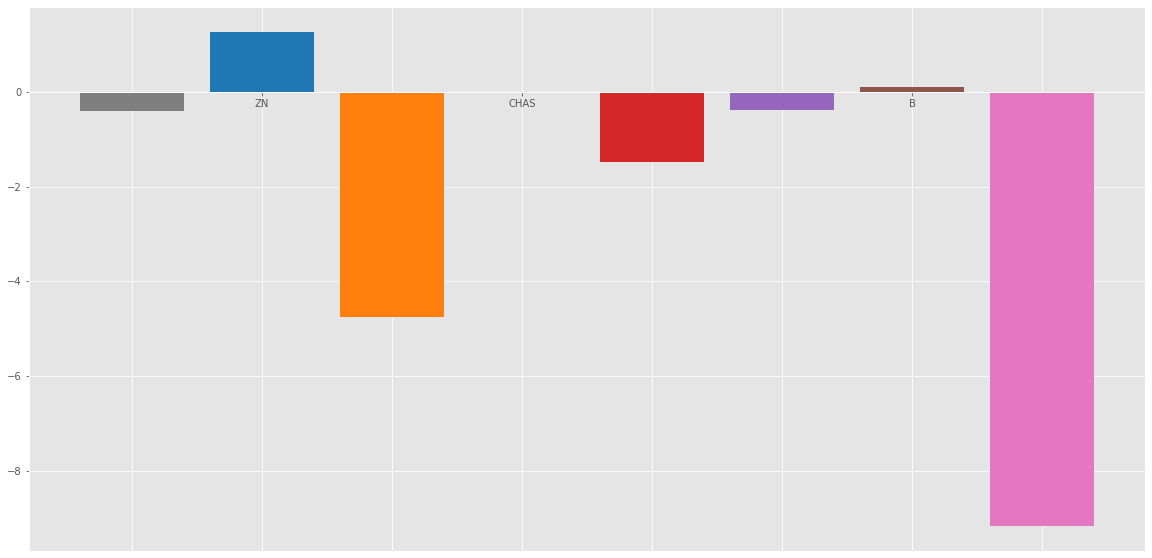

In [ ]:
# # plotting the coefficient score
# fig, ax = plt.subplots(figsize =(20, 10))

# color =['tab:gray', 'tab:blue', 'tab:orange',
# 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
# 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
# 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

# ax.bar(ridge_coefficient["Columns"],
# ridge_coefficient['Coefficient Estimate'],
# color = color)

# ax.spines['bottom'].set_position('zero')

# plt.style.use('ggplot')
# plt.show()

# **Lasso Regression:It is used for overfitting. But model is underfitting**

In [ ]:
# # import Lasso regression from sklearn library
# from sklearn.linear_model import Lasso

# # Train the model
# lasso = Lasso(alpha = 1)
# lasso.fit(X_train1, y_train1)
# y_pred1 = lasso.predict(X_test1)

# # Calculate Mean Squared Error
# mean_squared_error = np.mean((y_pred1 - y_test1)**2)
# print("Mean squared error on test set", mean_squared_error)
# lasso_coeff = pd.DataFrame()
# lasso_coeff["Columns"] = X_train1.columns
# lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

# print(lasso_coeff)

Mean squared error on test set 26.87598429752065
  Columns  Coefficient Estimate
0    CRIM                  -0.0
1      ZN                   0.0
2   INDUS                  -0.0
3    CHAS                   0.0
4     DIS                   0.0
5     RAD                  -0.0
6       B                   0.0
7   LSTAT                  -0.0


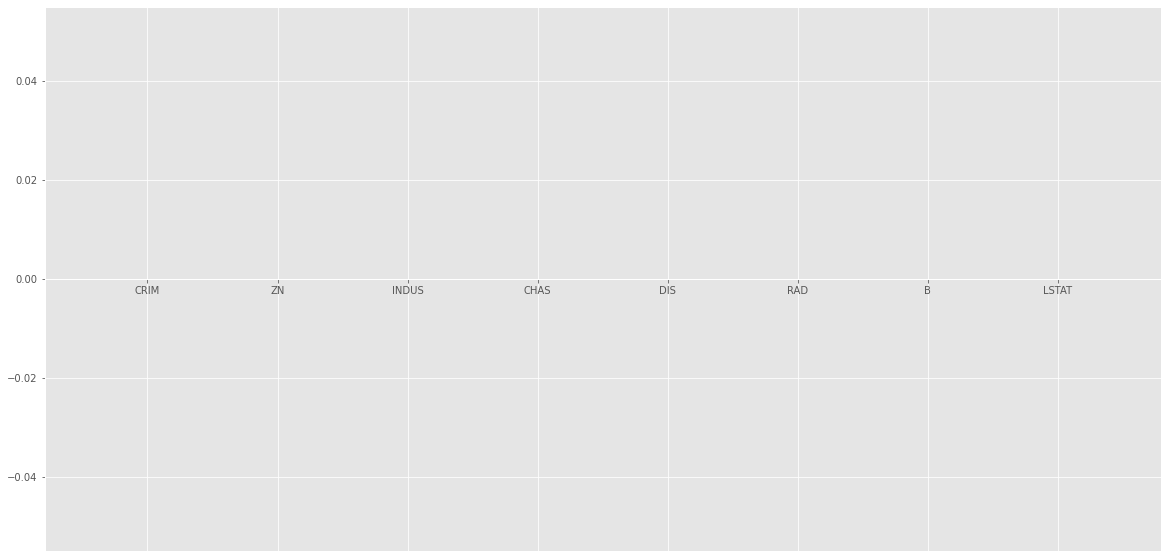

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coeff["Columns"],
lasso_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [ ]:
# # import Lasso regression from sklearn library
# from sklearn.linear_model import Lasso

# # Train the model
# lasso = Lasso(alpha = 3)
# lasso.fit(X_train1, y_train1)
# y_pred1 = lasso.predict(X_test1)

# # Calculate Mean Squared Error
# mean_squared_error = np.mean((y_pred1 - y_test1)**2)
# print("Mean squared error on test set", mean_squared_error)
# lasso_coeff = pd.DataFrame()
# lasso_coeff["Columns"] = X_train1.columns
# lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

# print(lasso_coeff)

Mean squared error on test set 26.87598429752065
  Columns  Coefficient Estimate
0    CRIM                  -0.0
1      ZN                   0.0
2   INDUS                  -0.0
3    CHAS                   0.0
4     DIS                   0.0
5     RAD                  -0.0
6       B                   0.0
7   LSTAT                  -0.0


In [ ]:
# # import Lasso regression from sklearn library
# from sklearn.linear_model import Lasso

# # Train the model
# lasso = Lasso(alpha = 5)
# lasso.fit(X_train1, y_train1)
# y_pred1 = lasso.predict(X_test1)

# # Calculate Mean Squared Error
# mean_squared_error = np.mean((y_pred1 - y_test1)**2)
# print("Mean squared error on test set", mean_squared_error)
# lasso_coeff = pd.DataFrame()
# lasso_coeff["Columns"] = X_train1.columns
# lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

# print(lasso_coeff)

Mean squared error on test set 26.87598429752065
  Columns  Coefficient Estimate
0    CRIM                  -0.0
1      ZN                   0.0
2   INDUS                  -0.0
3    CHAS                   0.0
4     DIS                   0.0
5     RAD                  -0.0
6       B                   0.0
7   LSTAT                  -0.0
